# LIVE DEMO OF THIS APP IS ON : AIWITHANKIT.ONLINE

# 1. DATA LOADING

In [1]:
#IMPORTANT LIBRARIES 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Test.csv")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
df.head(5)

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [3]:
df.shape

(5000, 2)

# 2. Data Cleaning

In [4]:
# missing values
df.isnull().sum()

text     0
label    0
dtype: int64

In [5]:
#making another coloumn of positive and negative

df['sentiment'] = df['label'].apply(lambda x:"positive" if x==1 else "negative")
df.head(5)


,text,label,sentiment
0,I always wrote this series off as being a comp...,0,negative
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,negative
2,This movie was so poorly written and directed ...,0,negative
3,The most interesting thing about Miryang (Secr...,1,positive
4,"when i first read about ""berlin am meer"" i did...",0,negative


In [6]:
df.duplicated().sum()

5

In [7]:
#dropping duplicates 

df =df.drop_duplicates()
df.duplicated().sum()

0

# 3. Exploratory Data Analysis

Text(0, 0.5, 'counts')

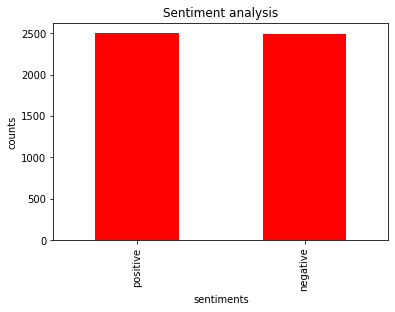

In [8]:
df['sentiment'].value_counts().plot(kind='bar',color='red')
plt.title("Sentiment analysis")
plt.xlabel("sentiments")
plt.ylabel("counts")

<AxesSubplot:ylabel='sentiment'>

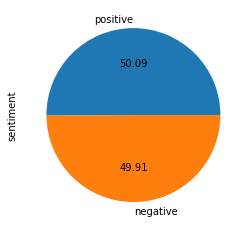

In [9]:
df['sentiment'].value_counts().plot(kind='pie',labels=['positive','negative'],autopct="%0.2f")

# 4. Data Preprocessing

In [10]:
#spacy implimentation
import spacy
analyzer = spacy.load('en_core_web_sm')
def preprocessor(text):
    example = analyzer(text)
    token_words = []
    processed_words = []
    for words  in example:
        if not words.is_stop and not words.is_punct:
            token_words.append(words)
    for new in token_words:
        processed_words.append(new.lemma_)
    token_words.clear()    
    return " ".join(processed_words)   
print(preprocessor("brasilian are good at fottball! and studying"))

brasilian good fottball study


In [11]:
df['processed_text'] = df['text'].apply(preprocessor)

In [12]:
df.head(5)

,text,label,sentiment,processed_text
0,I always wrote this series off as being a comp...,0,negative,write series complete stink f Jim Belushi invo...
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,negative,1st watch 12/7/2002 3 10(Dir Steve Purcell Typ...
2,This movie was so poorly written and directed ...,0,negative,movie poorly write direct fall asleep 30 minut...
3,The most interesting thing about Miryang (Secr...,1,positive,interesting thing Miryang Secret Sunshine acto...
4,"when i first read about ""berlin am meer"" i did...",0,negative,read berlin meer expect think right people rig...


In [13]:
df.text.iloc[1]

"1st watched 12/7/2002 - 3 out of 10(Dir-Steve Purcell): Typical Mary Kate & Ashley fare with a few more kisses. It looks to me like the girls are getting pretty tired of this stuff and it will be interesting what happens to them if they ever decide to split up and go there own ways. In this episode of their adventures they are interns in Rome for a `fashion' designer who puts them right into the mailroom to learn what working hard is all about(I guess..). Besides the typical flirtations with boys there is nothing much else except the Rome scenario until about ¾ way into the movie when it's finally revealed why they are getting fired, then re-hired, then fired again, then re-hired again. This is definetly made by people who don't understand the corporate world and it shows in their interpretation of it. Maybe the real world will be their next adventure(if there is one.). Even my kids didn't seem to care for this boring `adventure' in the make-believe. Let's see they probably only have 

In [14]:
df.processed_text.iloc[1]

'1st watch 12/7/2002 3 10(Dir Steve Purcell Typical Mary Kate Ashley fare kiss look like girl get pretty tired stuff interesting happen decide split way episode adventure intern Rome ` fashion designer put right mailroom learn work hard about(i guess typical flirtation boy Rome scenario ¾ way movie finally reveal getting fire hire fire hire definetly people understand corporate world show interpretation maybe real world adventure(if kid care boring ` adventure believe let probably couple year till legal adult happen'

# 5. Vectorization

In [15]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()

x = tfidf.fit_transform(df['processed_text']).toarray()


# 6. Model Training

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,df['label'],stratify=df['label'],test_size=0.2)

x_train.shape

(3996, 33173)

In [19]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
model = MultinomialNB().fit(x_train,y_train)
model_prediction = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,model_prediction))
print(precision_score(y_test,model_prediction))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       499
           1       0.90      0.81      0.85       500

    accuracy                           0.86       999
   macro avg       0.86      0.86      0.86       999
weighted avg       0.86      0.86      0.86       999

0.8955555555555555


In [23]:
import pickle
pickle.dump(tfidf,open('tifdfvectorizer.pkl','wb'))
pickle.dump(model,open('naivemodel.pkl','wb'))

In [24]:
input = preprocessor("perfect movie")
input

'perfect movie'

In [25]:
transformed_input = tfidf.transform([input])
model_prediction = model.predict(transformed_input)
model_prediction

array([1], dtype=int64)

# vectorization with spacy

In [20]:
analyzer = spacy.load('en_core_web_sm')
example = analyzer(text)
df['spacy_vectors'] = df['text'].apply(lambda x : analyzer(x).vector)

NameError: name 'text' is not defined

In [ ]:
df.head(5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df['spacy_vectors'].values,df['label'],stratify=df['label'],test_size=0.2)

X_train2d = np.stack(X_train)
X_test2d = np.stack(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_tranied_embed  = scaler.fit_transform(X_train2d)
scaled_test_embed  = scaler.transform(X_test2d)

In [ ]:
model = KNeighborsClassifier().fit(scaled_tranied_embed,Y_train)
model_prediction = model.predict(scaled_test_embed)
print(accuracy_score(Y_test,model_prediction))
print(confusion_matrix(Y_test,model_prediction))
print(precision_score(Y_test,model_prediction))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,model_prediction))

# Evaluating Model on Different Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
def algorithms(cv,x_train,y_train,x_test,y_test):
    model = cv().fit(x_train,y_train)
    model_prediction = model.predict(x_test)
    model_report = classification_report(y_test,model_prediction)
    return model_report
    

In [27]:
# LOGISTIC REGRESSION

logistic_reg = algorithms(LogisticRegression,x_train,y_train,x_test,y_test)
print(logistic_reg)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       748
           1       0.82      0.88      0.85       751

    accuracy                           0.84      1499
   macro avg       0.85      0.84      0.84      1499
weighted avg       0.85      0.84      0.84      1499



In [36]:
# suppport vector machine

support_vector_machine = algorithms(SVC,x_train,y_train,x_test,y_test)
print(support_vector_machine)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       748
           1       0.83      0.89      0.86       751

    accuracy                           0.85      1499
   macro avg       0.85      0.85      0.85      1499
weighted avg       0.85      0.85      0.85      1499



In [29]:
# DecisionTreeClassifier

Decision_tree = algorithms(DecisionTreeClassifier,x_train,y_train,x_test,y_test)
print(Decision_tree)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       748
           1       0.71      0.71      0.71       751

    accuracy                           0.71      1499
   macro avg       0.71      0.71      0.71      1499
weighted avg       0.71      0.71      0.71      1499



In [30]:
# KNeighborsClassifier

K_neighbour = algorithms(KNeighborsClassifier,x_train,y_train,x_test,y_test)
print(K_neighbour)

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       748
           1       0.70      0.66      0.68       751

    accuracy                           0.69      1499
   macro avg       0.69      0.69      0.69      1499
weighted avg       0.69      0.69      0.69      1499



C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
# RandomForestClassifier

random_forest = algorithms(RandomForestClassifier,x_train,y_train,x_test,y_test)
print(random_forest)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       748
           1       0.84      0.85      0.85       751

    accuracy                           0.85      1499
   macro avg       0.85      0.85      0.85      1499
weighted avg       0.85      0.85      0.85      1499



In [32]:
# AdaBoostClassifier

ada_boost = algorithms(AdaBoostClassifier,x_train,y_train,x_test,y_test)
print(ada_boost)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       748
           1       0.77      0.81      0.79       751

    accuracy                           0.78      1499
   macro avg       0.78      0.78      0.78      1499
weighted avg       0.78      0.78      0.78      1499



In [33]:
# BaggingClassifier

bagging = algorithms(BaggingClassifier,x_train,y_train,x_test,y_test)
print(bagging)

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       748
           1       0.77      0.74      0.76       751

    accuracy                           0.76      1499
   macro avg       0.76      0.76      0.76      1499
weighted avg       0.76      0.76      0.76      1499



In [34]:
# GradientBoostingClassifier

gradient_boost = algorithms(GradientBoostingClassifier,x_train,y_train,x_test,y_test)
print(gradient_boost)

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       748
           1       0.76      0.87      0.81       751

    accuracy                           0.80      1499
   macro avg       0.81      0.80      0.80      1499
weighted avg       0.81      0.80      0.80      1499



In [35]:
# XGBClassifier

xgb = algorithms(XGBClassifier,x_train,y_train,x_test,y_test)
print(xgb)

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       748
           1       0.80      0.85      0.83       751

    accuracy                           0.82      1499
   macro avg       0.82      0.82      0.82      1499
weighted avg       0.82      0.82      0.82      1499

